## Correlation $\langle z_i F_J \rangle$

#### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [15]:
ls=[16,24,32,64,128]
h_max=5.44
zf={}
f={}
z={}
for l in ls:
    data=np.load(f'data/input_output_map/input_output_2nn_{l}_l_{h_max}_h_100_n.npz')
    zf[l]=data['correlation']
    f[l]=data['density_F']
    z[l]=data['density']

#### Study the Quantum Covariance

In [16]:

g={}
for l in ls:

    cov=zf[l]-f[l][:,None,:]*z[l][:,:,None]

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    
g_cl={}
for l in ls:
    
    df=f[l]-np.average(f[l],axis=0)[None,:]
    dz=z[l]-np.average(z[l],axis=0)[None,:]
    
    cov=np.average(df[:,None,:]*dz[:,:,None],axis=0)/(np.std(f[l],axis=0)[None,:,None]*np.std(z[l],axis=0)[None,None,:])

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g_cl[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    

In [ ]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1)[1:],label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.semilogy()
plt.show()

plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=1),label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.loglog()
plt.show()

for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=0),label=f'size={l} cl')
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1),label=f'size={l} quantum')
    plt.show()


## Classical ZXX correlation

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [19]:
ls=[12,16,24,32]
zs={}
fs={}
cov={}
g={}
for l in ls:
    data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{l}_l_2.7_h_15000_n.npz')
    z=data['density']
    f=data['density_F']
    zs[l]=z
    fs[l]=f
    cov[l]=np.average(z[:,:,None]*z[:,None,:],axis=0)-np.average(z,axis=0)[:,None]*np.average(z,axis=0)[None,:]
    cov[l]=cov[l]/(np.std(z,axis=0)[:,None]*np.std(f,axis=0)[None,:])
    
    idx=np.arange(l)
    c=np.zeros((l,l))
    print(c.shape)
    print(cov[l].shape)
    for i in range(l):
        c[i%l,:]=cov[l][idx,(idx+i)%l]

    g[l]=np.average(c,axis=-1)

(12, 12)
(12, 12)
(16, 16)
(16, 16)
(24, 24)
(24, 24)
(32, 32)
(32, 32)


#### Plots

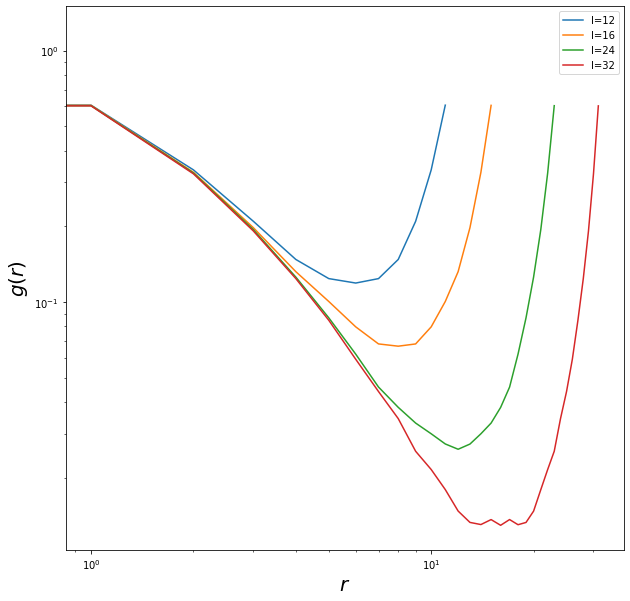

In [21]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(g[l],label=f'l={l}')
plt.loglog()
plt.legend()
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$g(r)$',fontsize=20)
plt.show()